# **Problemas de Estadística Descriptiva**

## **Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?**

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


# Imports & Adquirir datos

In [49]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import statistics as stats

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

In [50]:
df['title_length'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


# Calcula media, mediana y moda de la columna 'title_length'

In [51]:
# Creo un diccionario para acumular los resultados de los cálculos estadísticos.
measures = {}

In [52]:
# Genero los cálculos a través de funciones:
mean_title = df['title_length'].mean()
median_title = df['title_length'].median()
mode_title = stats.mode(df['title_length'])

In [53]:
# Creo las claves para almacenar los valores respectivos en el diccionario.
measures['mean'] = mean_title
measures['median'] = median_title
measures['mode'] = mode_title

measures

{'mean': np.float64(15.481103166496425),
 'median': np.float64(14.0),
 'mode': 12}

# Calcula el rango, la varianza y la desviación estándar de 'title_length'

In [54]:
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
title_length        int64
dtype: object

In [55]:
# Se repite al proceso anterior para los nuevos cálculos:
title_range = df['title_length'].max(), df['title_length'].min()
var_title = df['title_length'].var()
std_title = df['title_length'].std()

measures['range'] = title_range
measures['var'] = var_title
measures['std'] = std_title

measures

{'mean': np.float64(15.481103166496425),
 'median': np.float64(14.0),
 'mode': 12,
 'range': (np.int64(68), np.int64(1)),
 'var': np.float64(72.1067488840288),
 'std': np.float64(8.491569282766807)}

# Calcula asimetría y curtosis de la columna 'title_length'

In [56]:
skewness_title = df['title_length'].skew()
kurt_title = df['title_length'].kurt()

f"La asimetría es de {skewness_title}, y la curtosis de {kurt_title}"

'La asimetría es de 1.5252523464631278, y la curtosis de 3.8122887061291544'

In [57]:
# Imprime el título más corto según su longitud
shorter_title = df.loc[df['title_length'].idxmin(), 'title']

f' El título más corto es: {shorter_title}.'


' El título más corto es: M.'

In [58]:
# Imprime el título más largo según su longitud
longer_title = df.loc[df['title_length'].idxmax(),'title']

f'El título más largo es: {longer_title}.'

'El título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.'

# Grafica tus resultados

https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

guardar link de hist

* **Boxplot**

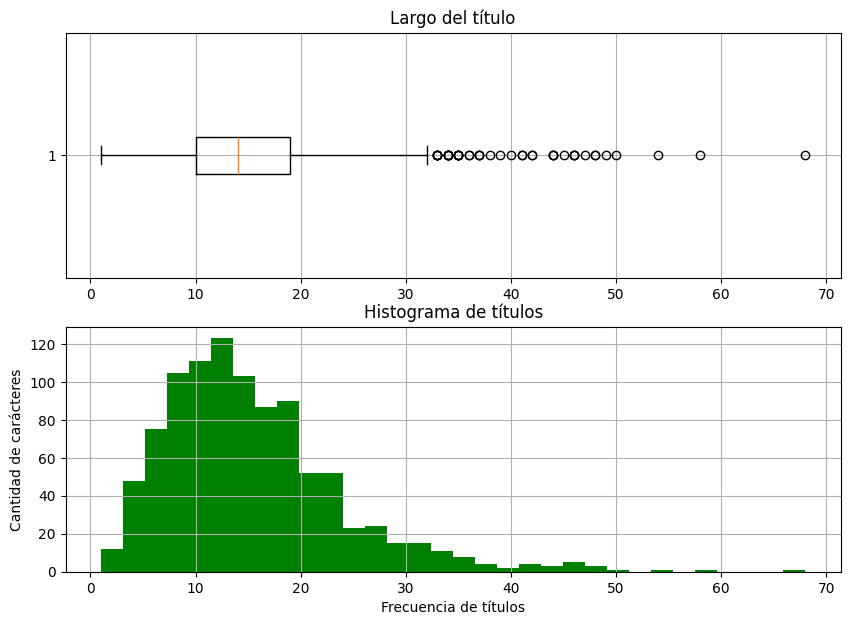

In [59]:
fig, ax = plt.subplots(2,1, figsize=(10,7))

# Boxplot:
ax[0].boxplot(df['title_length'], orientation='horizontal')
ax[0].set_title("Largo del título")
ax[0].grid(True)

ax[1].hist(df['title_length'], bins='sqrt', color='g') # bins='sqrt' divide el histograma en 
ax[1].set_title("Histograma de títulos")
ax[1].set_ylabel("Cantidad de carácteres")
ax[1].set_xlabel("Frecuencia de títulos")
ax[1].grid(True)

---

# **Ejercicio 2 – Cálculo manual de desviación estándar**

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


# Crea una lista con 5 valores reales de df['title_length']
* Por ejemplo: [10, 13, 14, 18, 22]

In [60]:
df['title_length']

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64

In [61]:
list_std = [df.loc[3,'title_length'],df.loc[33,'title_length'],df.loc[333,'title_length'],df.loc[666,'title_length'], df.loc[978,'title_length']]
list_std

[np.int64(15), np.int64(8), np.int64(13), np.int64(16), np.int64(11)]

In [62]:
# Calcula la media de los 5 valores
total_sum  = sum(list_std)
mean_list = total_sum / len(list_std)
mean_list

np.float64(12.6)

In [63]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_data = [x - mean_list for x in list_std]
diferencias_data

[np.float64(2.4000000000000004),
 np.float64(-4.6),
 np.float64(0.40000000000000036),
 np.float64(3.4000000000000004),
 np.float64(-1.5999999999999996)]

In [64]:
diferencias_cuadrado = [x **2 for x in diferencias_data]
diferencias_cuadrado

[np.float64(5.760000000000002),
 np.float64(21.159999999999997),
 np.float64(0.16000000000000028),
 np.float64(11.560000000000002),
 np.float64(2.5599999999999987)]

In [65]:
# Varianza (promedio de las diferencias al cuadrado) 
var = sum(diferencias_cuadrado) / len(list_std)
var


np.float64(8.24)

In [66]:
# Raíz cuadrada para obtener la desviación estándar
desviacion = var **(1/2)
desviacion


np.float64(2.870540018881465)